### Fallas Cardiacas

In [1]:
# #? Cargamos las librerias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pydotplus
import matplotlib.image as pltimg

In [2]:
# dataframe
dataset = pd.read_csv("../dataset/heart_failure_clinical_records_dataset.csv")
dataset.tail()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
294,62.0,0,61,1,38,1,155000.0,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.0,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.0,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.0,1.4,140,1,1,280,0
298,50.0,0,196,0,45,0,395000.0,1.6,136,1,1,285,0


In [3]:
# (filas, columnas)
dataset.shape

(299, 13)

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [5]:
# dataframe
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
age,299.0,60.833893,11.894809,40.0,51.0,60.0,70.0,95.0
anaemia,299.0,0.431438,0.496107,0.0,0.0,0.0,1.0,1.0
creatinine_phosphokinase,299.0,581.839465,970.287881,23.0,116.5,250.0,582.0,7861.0
diabetes,299.0,0.418060,0.494067,0.0,0.0,0.0,1.0,1.0
ejection_fraction,299.0,38.083612,11.834841,14.0,30.0,38.0,45.0,80.0
high_blood_pressure,299.0,0.351171,0.478136,0.0,0.0,0.0,1.0,1.0
platelets,299.0,263358.029264,97804.236869,25100.0,212500.0,262000.0,303500.0,850000.0
serum_creatinine,299.0,1.393880,1.034510,0.5,0.9,1.1,1.4,9.4
serum_sodium,299.0,136.625418,4.412477,113.0,134.0,137.0,140.0,148.0
sex,299.0,0.648829,0.478136,0.0,0.0,1.0,1.0,1.0


<function matplotlib.pyplot.show(close=None, block=None)>

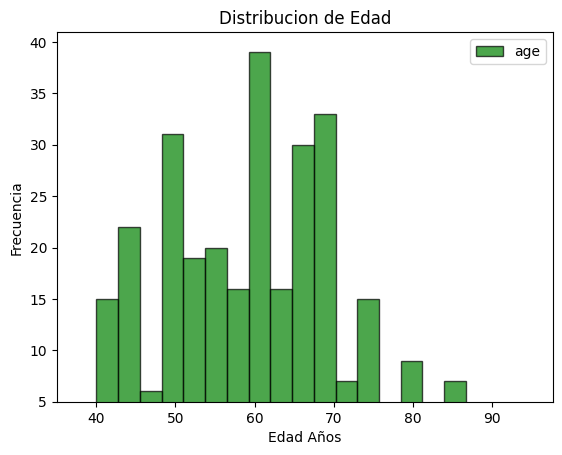

In [6]:
# Graficamos la edad a travez de un histograma
dataset["age"].plot(kind='hist', bins=20, color='green', title='Distribucion de Edad',
                    xlabel='Edad Años', ylabel='Frecuencia',
                    alpha=0.7, edgecolor='black', linewidth=1)
plt.xlim(35)
plt.ylim(5)
plt.legend()
plt.show


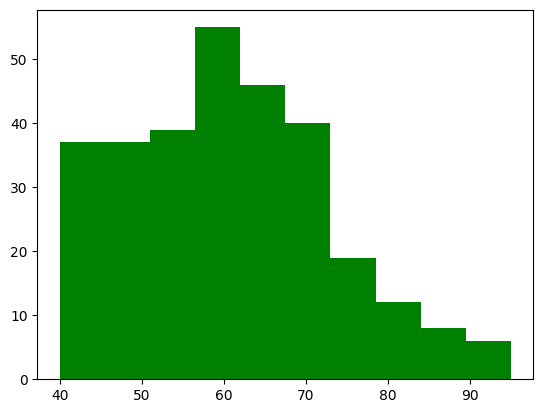

In [7]:
plt.hist(dataset['age'], color="green");

In [8]:
dataset['age'].describe()

count    299.000000
mean      60.833893
std       11.894809
min       40.000000
25%       51.000000
50%       60.000000
75%       70.000000
max       95.000000
Name: age, dtype: float64

In [9]:
# Cuantos Ejemplos existen 
dataset.smoking.value_counts()

smoking
0    203
1     96
Name: count, dtype: int64

In [10]:
# Cuantos Ejemplos existen 
dataset.diabetes.value_counts()

diabetes
0    174
1    125
Name: count, dtype: int64

### Dividimos los Datos en variables independientes y dependientes      

In [11]:
X= dataset.drop("DEATH_EVENT", axis=1) ##! variables independientes
y = pd.DataFrame(dataset["DEATH_EVENT"]) ##! variables dependientes
y

,DEATH_EVENT
0,1
1,1
2,1
3,1
4,1
...,...
294,0
295,0
296,0
297,0


## Dividimos los datos en datos de training(Entrenamiento) y datos de Test (Prueba)

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
 #    vi                vd                                   tamaño              ramdom
print("75% para train y 25% para Test")
print(X_train.shape)
print(X_test.shape)

75% para train y 25% para Test
(224, 12)
(75, 12)


## Apliquemos el algoritmo de Clasificacoin

In [13]:
from sklearn.tree import DecisionTreeClassifier
clasificador = DecisionTreeClassifier(random_state=0)
clasificador.fit(X_train, y_train)
y_pred = clasificador.predict(X_test)

In [14]:
print(y_pred)
print(y_test)

[0 0 1 0 0 0 1 0 0 0 0 1 1 0 1 1 0 0 0 0 1 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0
 0 0 1 0 1 0 0 1 0 0 0 1 0 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1
 1]
     DEATH_EVENT
206            0
188            0
12             1
219            0
237            0
..           ...
156            0
226            0
272            0
27             1
144            1

[75 rows x 1 columns]


In [15]:
# calculamos exactitud del modelo
clasificador.score(X_test, y_test)
                #  Test | resultado

0.7733333333333333